# Confidence Intervals, Outliers, and Statistical Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('../Data/BrainSize.csv', sep=';', na_values='.')

### Review Activity: Calculate the T_test for male and female VIQ

In [2]:
male_viq = df[df['Gender'] == 'Male']['VIQ']
female_viq = df[df['Gender'] == 'Female']['VIQ']

stats.ttest_ind(male_viq, female_viq)

Ttest_indResult(statistic=0.7726161723275011, pvalue=0.44452876778583217)

### Review Activity: Calculate the T_test for male and female for all columns

In [3]:
for column in df.columns[2:len(df.columns)-1]:
    male_column = df[df['Gender'] == 'Male'][column].dropna()
    female_column = df[df['Gender'] == 'Female'][column].dropna()
    ttest = stats.ttest_ind(male_column, female_column)

    if ttest[0] < .05:
        print('P_Value below 0.5 accepts that {} are different for male and female'.format(column))
    else:
        print('P_Value above 0.5 rejects that {} are different for male and female'.format(column))

P_Value above 0.5 rejects that FSIQ are different for male and female
P_Value above 0.5 rejects that VIQ are different for male and female
P_Value above 0.5 rejects that PIQ are different for male and female
P_Value above 0.5 rejects that Weight are different for male and female
P_Value above 0.5 rejects that Height are different for male and female


# Confidence Interval 
- A range of plausible values for an unknown parameter. The interval has an associated confidence level that the true parameter is in the proposed range.
- Probability(lower bound < mean < upper bound) = 1 - x, where x is the significan levels
- An example is when a game rolls out a new version, and you want to compare the play time between the old and new version. To do this you would ge the mean play time for each version and then compare the conficence interval for each version to see if the one's conficence bound is greatter than the other.

In [4]:
df = pd.read_csv('../Data/Iris.csv')

### Activity: Calculating confidence interval for mean

In [5]:
sepal_lengths = df[df['Species'] == 'Iris-setosa']['SepalLengthCm']
standard = np.std(sepal_lengths, ddof=1)

def ci_t(data_sample, significant_level):
    t = stats.t.ppf(1- significant_level/2, len(data_sample)-1)
    lower_bound = np.mean(data_sample) - t * np.std(data_sample) / np.sqrt(len(data_sample))
    upper_bound = np.mean(data_sample) + t * np.std(data_sample) / np.sqrt(len(data_sample))
    return lower_bound, upper_bound
print(ci_t(sepal_lengths, 0.05))

(4.90683036358282, 5.10516963641718)


# Outlier Detection
- outliers are extreem values that can skew our dataset. We need to find these values and remove them from the dataset.

### Activity: Create a function to find and remove all the outliers in our normalized dataset

In [6]:
def find_remove_outliers(data_set):
    data_mean, data_std = np.mean(data_set), np.std(data_set)
    cut_off = data_std * 3
    lower_bound, upper_bound = data_mean - cut_off, data_mean + cut_off
    outliers = [value for value in data_set if value < lower_bound or value > upper_bound]
    outliers_removed = [value for value in data_set if value > lower_bound and value < upper_bound]
    return outliers, outliers_removed

outliers = np.array([-5, 11, 14])
data = np.concatenate((stats.norm.rvs(loc=5, scale=1, size=100), outliers))
print(find_remove_outliers(data)[0])

[-5.0, 11.0, 14.0]


## Interquartile range (IQR)
- We use IQR for finding and removing outliers when the data has any kind of distribution
- John Tukey suggested to calculate the range between the first quartile (25%) and third quartile (75%) in the data, which is the IQR.

### Activity: Create a function that uses IQR for outlier detection and removal¶

In [7]:
import numpy as np
import scipy.stats

def find_remove_outlier_iqr(data_sample):
    # calculate interquartile range
    q25, q75 = np.percentile(data_sample, 25), np.percentile(data_sample, 75)
    iqr = q75 - q25
    print('IQR', iqr)
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify  and remove outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers

y = np.array([-5, 11, 14])
x =  np.concatenate((scipy.stats.norm.rvs(loc=5 , scale=1 , size=100), y))
print(find_remove_outlier_iqr(x))
print('IQR', scipy.stats.iqr(x))

IQR 1.4526527488240486
[-5.0, 11.0, 14.0]
IQR 1.4526527488240486


## How do we visualize IQR?
Answer: Box Plots use IQR already!

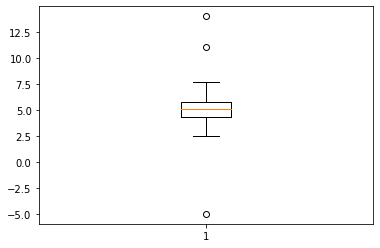

In [8]:
import matplotlib.pyplot as plt
plt.boxplot(x)
plt.show()